In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("recomdata.csv")

In [38]:
df


,interests,category,preferred_difficulty,past_experience,preferred_language,recommended_course
0,World Literature,literature,beginner,intermediate,English,World Literature beginner English
1,Ruby,programming,beginner,none,English,Ruby beginner English
2,Electricity and Magnetism,physics,advanced,intermediate,English,Electricity and Magnetism advanced English
3,Inorganic Chemistry,chemistry,beginner,advanced,Hindi,Inorganic Chemistry beginner Hindi
4,Inorganic Chemistry,chemistry,advanced,basic,English,Inorganic Chemistry advanced English
...,...,...,...,...,...,...
4995,Computer Vision,machine learning,intermediate,advanced,Hindi,Computer Vision intermediate Hindi
4996,English Literature,literature,advanced,none,Hindi,English Literature advanced Hindi
4997,Analytical Chemistry,chemistry,advanced,advanced,Hindi,Analytical Chemistry advanced Hindi
4998,Medieval History,history,beginner,none,English,Medieval History beginner English


In [39]:
df.head()


,interests,category,preferred_difficulty,past_experience,preferred_language,recommended_course
0,World Literature,literature,beginner,intermediate,English,World Literature beginner English
1,Ruby,programming,beginner,none,English,Ruby beginner English
2,Electricity and Magnetism,physics,advanced,intermediate,English,Electricity and Magnetism advanced English
3,Inorganic Chemistry,chemistry,beginner,advanced,Hindi,Inorganic Chemistry beginner Hindi
4,Inorganic Chemistry,chemistry,advanced,basic,English,Inorganic Chemistry advanced English


In [40]:
df.tail()


,interests,category,preferred_difficulty,past_experience,preferred_language,recommended_course
4995,Computer Vision,machine learning,intermediate,advanced,Hindi,Computer Vision intermediate Hindi
4996,English Literature,literature,advanced,none,Hindi,English Literature advanced Hindi
4997,Analytical Chemistry,chemistry,advanced,advanced,Hindi,Analytical Chemistry advanced Hindi
4998,Medieval History,history,beginner,none,English,Medieval History beginner English
4999,Calculus,math,beginner,advanced,English,Calculus beginner English


In [41]:
df.shape


(5000, 6)

In [42]:
df.columns


Index(['interests', 'category', 'preferred_difficulty', 'past_experience',
       'preferred_language', 'recommended_course'],
      dtype='object')

In [43]:
df.count()



interests               5000
category                5000
preferred_difficulty    5000
past_experience         5000
preferred_language      5000
recommended_course      5000
dtype: int64

In [44]:
df.describe()


,interests,category,preferred_difficulty,past_experience,preferred_language,recommended_course
count,5000,5000,5000,5000,5000,5000
unique,41,8,3,4,2,246
top,Organic Chemistry,programming,beginner,none,English,Organic Chemistry intermediate English
freq,156,1058,1677,1298,2506,35


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   interests             5000 non-null   object
 1   category              5000 non-null   object
 2   preferred_difficulty  5000 non-null   object
 3   past_experience       5000 non-null   object
 4   preferred_language    5000 non-null   object
 5   recommended_course    5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


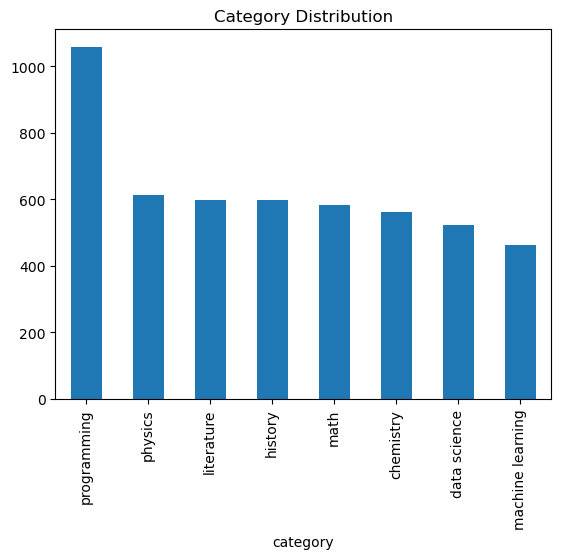

In [46]:
df = pd.read_csv('recomdata.csv')
df['category'].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.show()

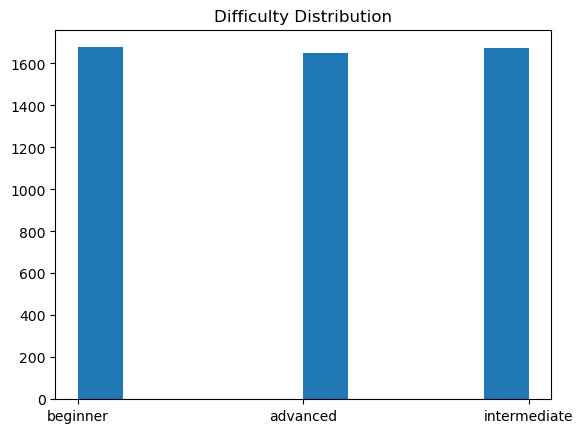

In [47]:
plt.hist(df['preferred_difficulty'])
plt.title("Difficulty Distribution")
plt.show()

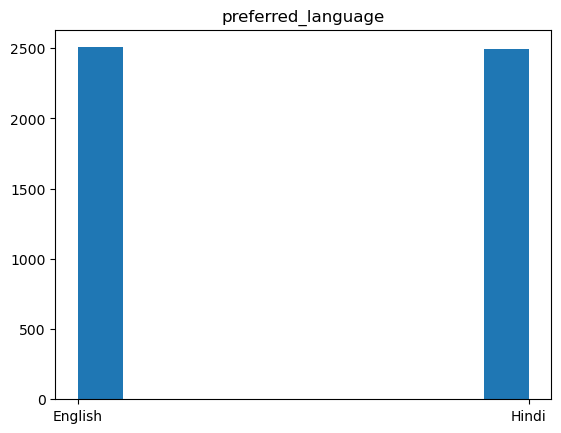

In [48]:
plt.hist(df['preferred_language'])
plt.title("preferred_language")
plt.show()

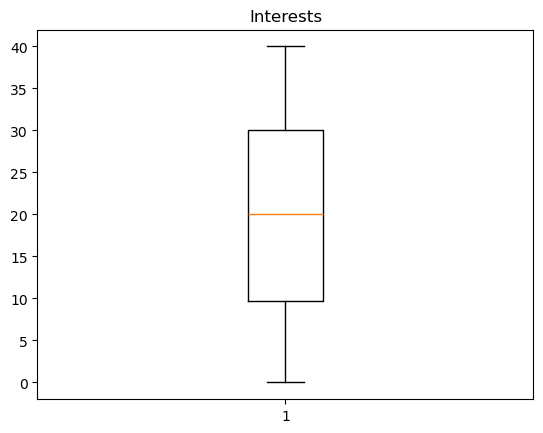

In [49]:
plt.boxplot(df['interests'].astype('category').cat.codes)
plt.title("Interests")
plt.show()

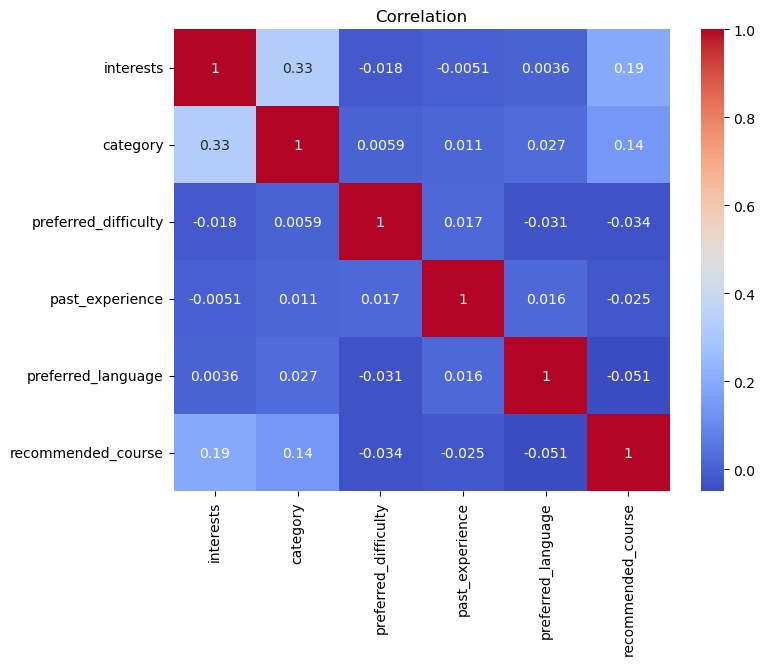

In [50]:
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [51]:
print(df.isnull().sum())

interests               0
category                0
preferred_difficulty    0
past_experience         0
preferred_language      0
recommended_course      0
dtype: int64


In [52]:
def fillnaObjectMode(cols):
    for i in cols:
        df[i] = df[i].fillna(df[i].mode()[0])

columns = ['interests', 'past_experience', 'preferred_language']
fillnaObjectMode(columns)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   interests             5000 non-null   object
 1   category              5000 non-null   object
 2   preferred_difficulty  5000 non-null   object
 3   past_experience       5000 non-null   object
 4   preferred_language    5000 non-null   object
 5   recommended_course    5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB


In [54]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

X = df.drop("recommended_course", axis=1)
y = df["recommended_course"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [56]:
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.996

In [59]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model successfully saved as 'random_forest_model.pkl'!")

Model successfully saved as 'random_forest_model.pkl'!
